# Distributions for cluster 3

In [1]:
import pandas as pd
from distfit import distfit
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [ ]:
PATH_DIR = './'
os.chdir(PATH_DIR)

## Initialization

In [2]:
PATH = 'Data/Original dataset 11-2022/'
FILE_NAME = 'clustered_users_3.xlsx'

dataset = pd.read_excel(PATH+FILE_NAME)

In [3]:
def find_distribution(dataset, distr=None, bins='auto', method=None):

    # Initialize distfit

    if (method!=None): # binary
        dist = distfit(method=method)
    elif (distr==None): # find distribution amongst the almost 90 possible distributions
        dist = distfit(distr='popular', bins=bins)
    else: # fit specific distribution
        dist = distfit(distr=distr, bins=bins)

    # Determine best-fitting probability distribution for data
    dist.fit_transform(dataset, verbose=0)

    return dist

def plot_best_distributions(data, model, num_distr, xlim, figsize):
    
    for i in range(num_distr):
        model_plot = find_distribution(data, distr=model.summary['name'][i])
        model_plot.plot(cii_properties=None, bar_properties=None, xlim=xlim, figsize=figsize)


def get_distr_object(distr_name):
    distr = {
        "beta": stats.beta,
        "dweibull": stats.dweibull,
        "expon": stats.expon,
        "gamma": stats.gamma,
        "genextreme": stats.genextreme,
        "loggamma": stats.loggamma,
        "lognorm": stats.lognorm,
        "norm": stats.norm,
        "pareto": stats.pareto,
        "t": stats.t,
    }
    return distr.get(distr_name)

def make_qqplot(data, distr_name, params):
    distr = get_distr_object(distr_name)
    try:
        stats.probplot(data, dist=distr, sparams=params, plot=plt)
    except:
        stats.probplot(data, dist=distr, sparams=(params[1], params[2]), plot=plt)    
    plt.title(distr_name)
    plt.show()

def make_multiple_qqplot_old(data):
    fig, ax = plt.subplots(2,5, figsize=(30,10))
    i = 0
    j = 0
    for distr_name in ["beta", "dweibull", "expon", "gamma", "genextreme", "loggamma", "lognorm", "norm", "pareto", "t"]:

        # Initialize
        dfit = distfit(distr=distr_name)

        # Fit
        dfit.fit_transform(data, verbose=0)

        params = dfit.summary['params'][0]

        distr = get_distr_object(distr_name)

        if (j > 4):
            i = 1
            j = 0
        
        try:
            stats.probplot(data, dist=distr, sparams=params, plot=ax[i][j])
        except:
            stats.probplot(data, dist=distr, sparams=(params[1], params[2]), plot=ax[i][j])
        ax[i][j].set_title(distr_name)
        j += 1
    fig.show()

def make_multiple_qqplot(data, model):
    fig, ax = plt.subplots(2,5, figsize=(30,10))
    i = 0
    j = 0
    k = 0
    for distr_name in model.summary['name']:

        if (distr_name != 'uniform'):

            params = model.summary['params'][k]

            distr = get_distr_object(distr_name)

            if (j > 4):
                i = 1
                j = 0
            
            try:
                stats.probplot(data, dist=distr, sparams=params, plot=ax[i][j])
            except:
                stats.probplot(data, dist=distr, sparams=(params[1], params[2]), plot=ax[i][j])
            ax[i][j].set_title(distr_name)
            j += 1
        k += 1
        
    fig.show()

## Numerical attributes

### friends_count

In [7]:
# Initialize data
data = dataset['friends_count']

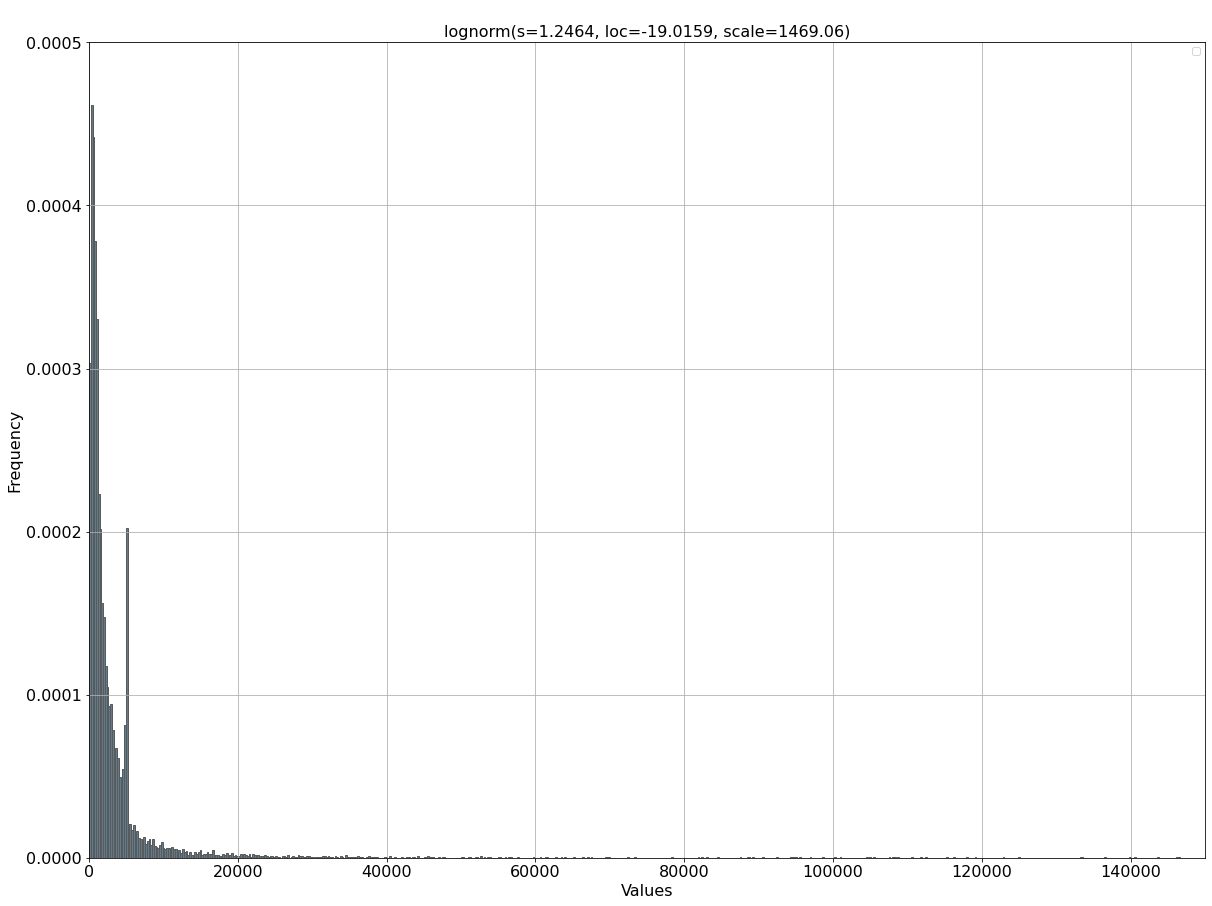

In [8]:
# Density distribution

# Initialize
dfit = distfit(alpha=0.01)

# Fit
dfit.fit_transform(data, verbose=0)

# Plot seperately
fig, ax = dfit.plot(xlim=(0,1.5e5),ylim=(0,0.0005),chart='pdf', cii_properties=None, emp_properties=None, pdf_properties=None)

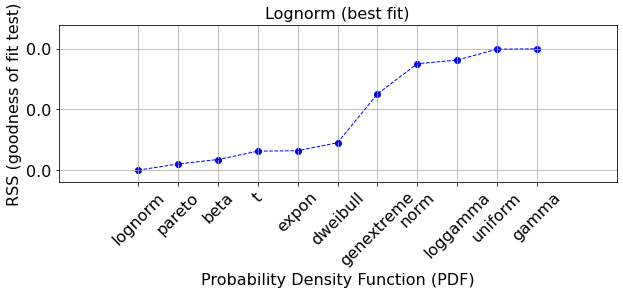

In [9]:
# Find best fitted distribution
model = find_distribution(data)

# Plot the best distributions RSS
model.plot_summary(figsize=(10, 3))
plt.show()

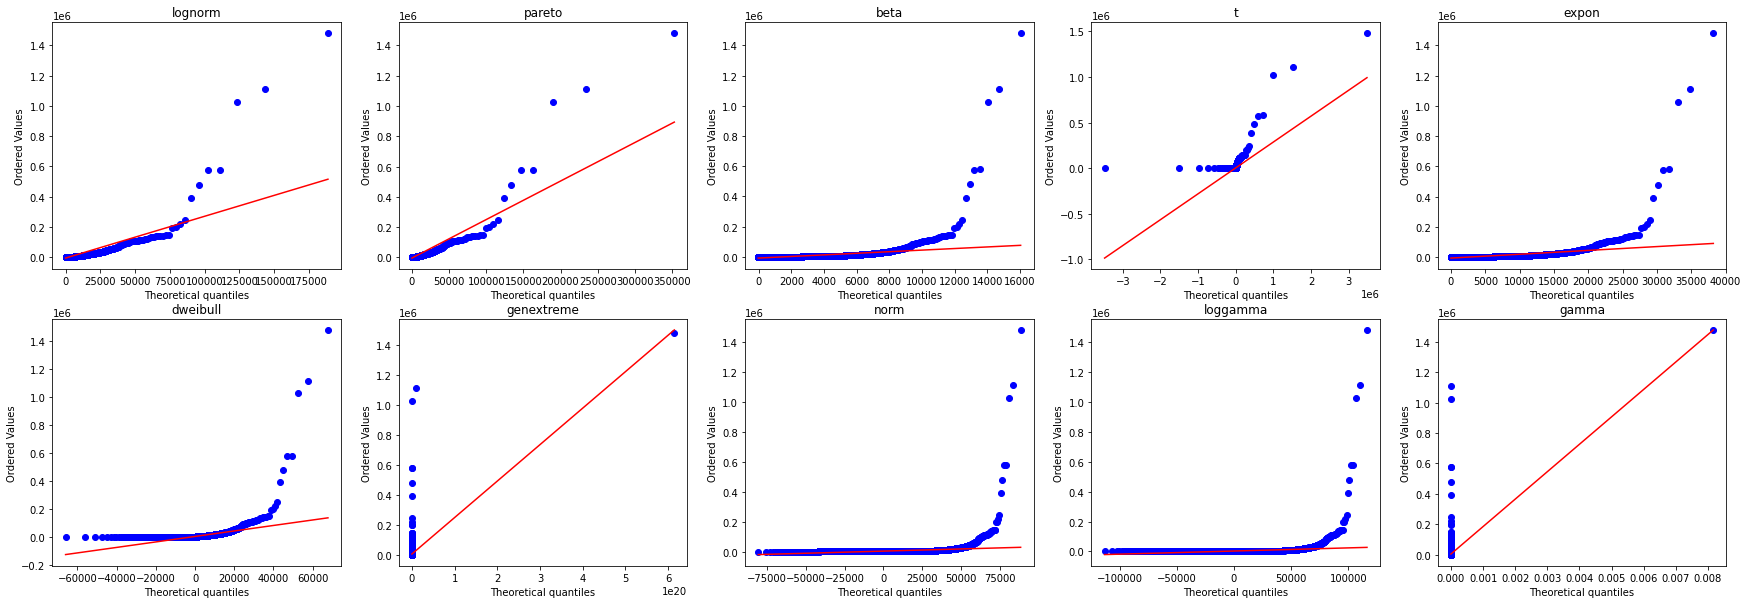

In [10]:
make_multiple_qqplot(data, model)

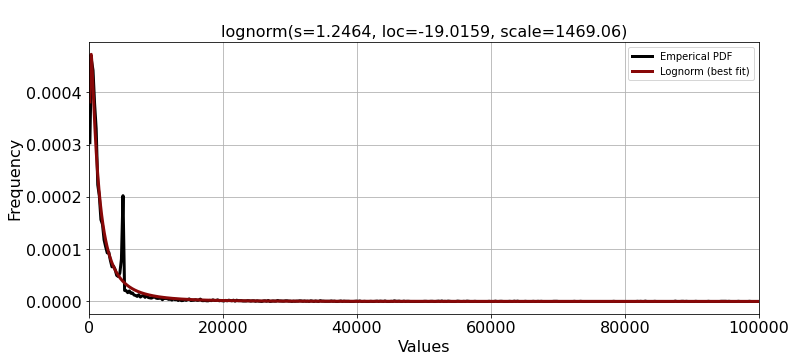

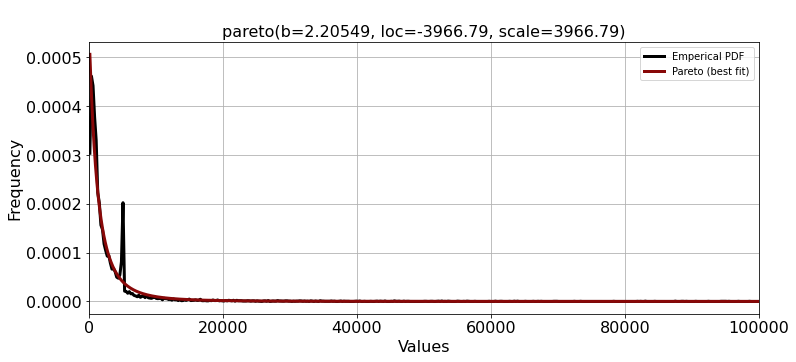

In [11]:
plot_best_distributions(data, model, num_distr=2, xlim=(0,100000), figsize=(12,5))

Chosen distr: lognormal

### followers_count

In [12]:
# Initialize data
data = dataset['followers_count']

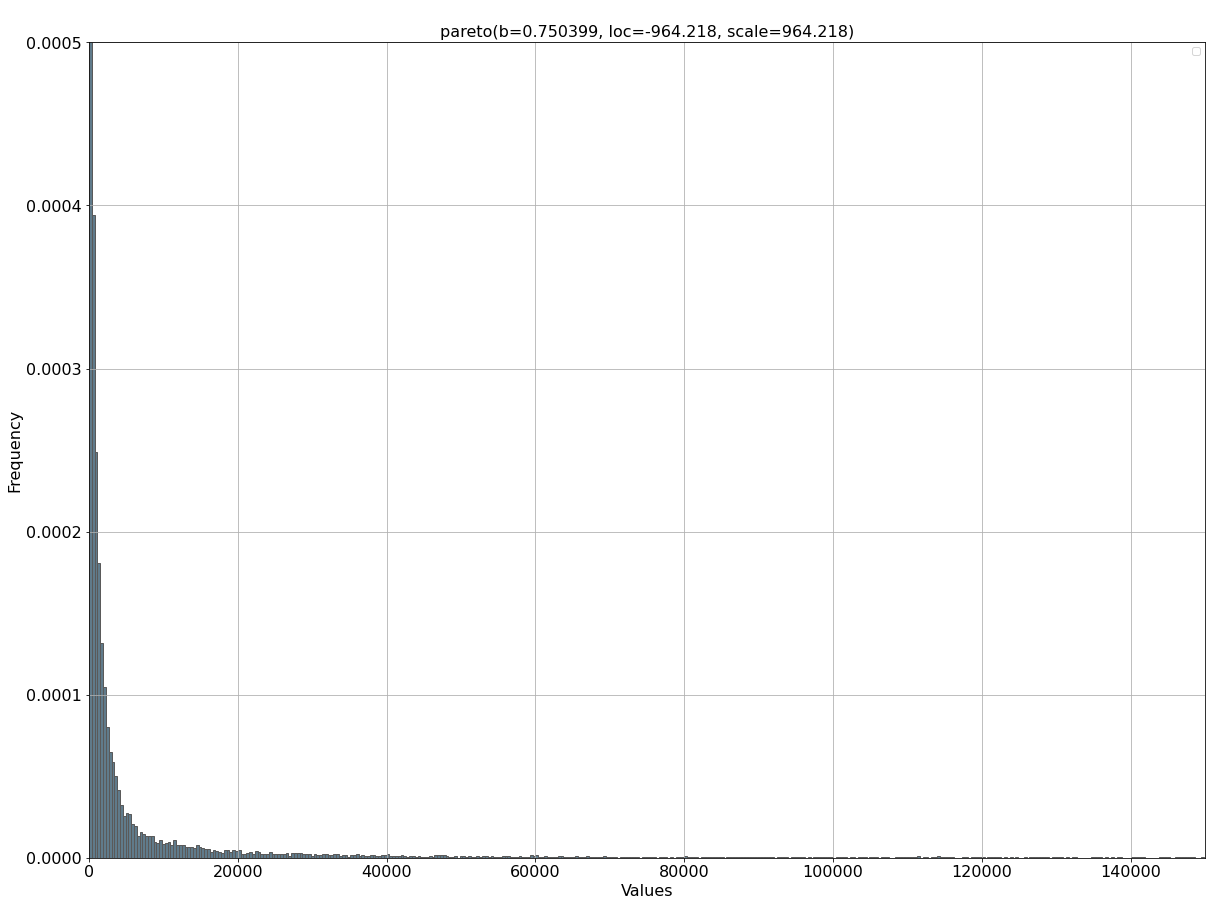

In [13]:
# Density distribution

# Initialize
dfit = distfit(alpha=0.01)

# Fit
dfit.fit_transform(data, verbose=0)

# Plot seperately
fig, ax = dfit.plot(xlim=(0,1.5e5),ylim=(0,0.0005),chart='pdf', cii_properties=None, emp_properties=None, pdf_properties=None)

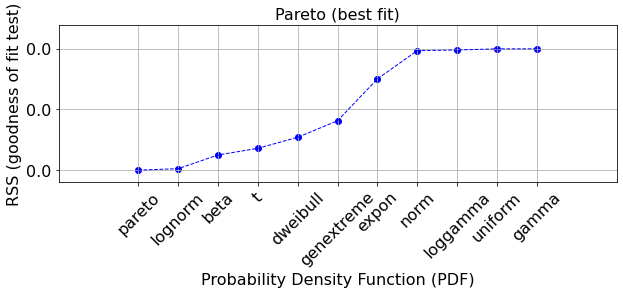

In [14]:
# Find best fitted distribution
model = find_distribution(data)

# Plot the best distributions RSS
model.plot_summary(figsize=(10, 3))
plt.show()

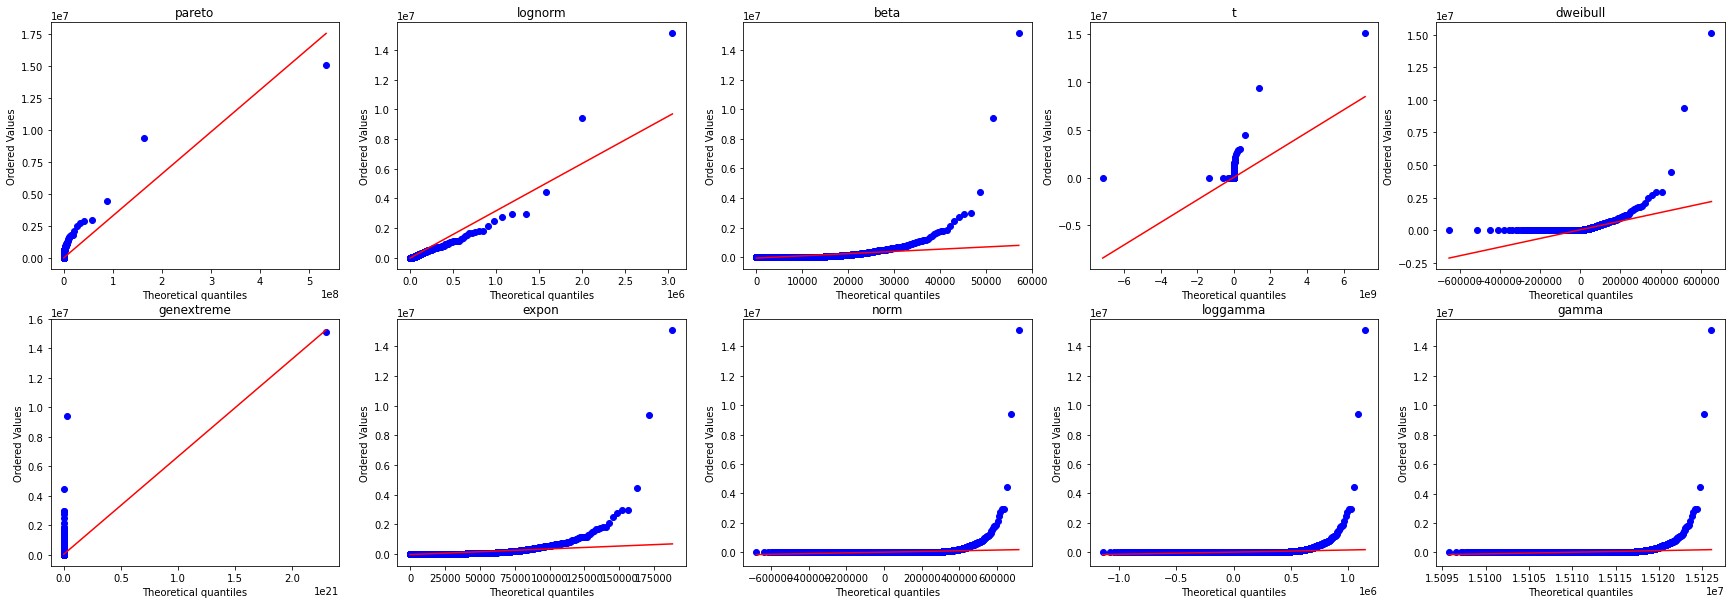

In [15]:
make_multiple_qqplot(data, model)

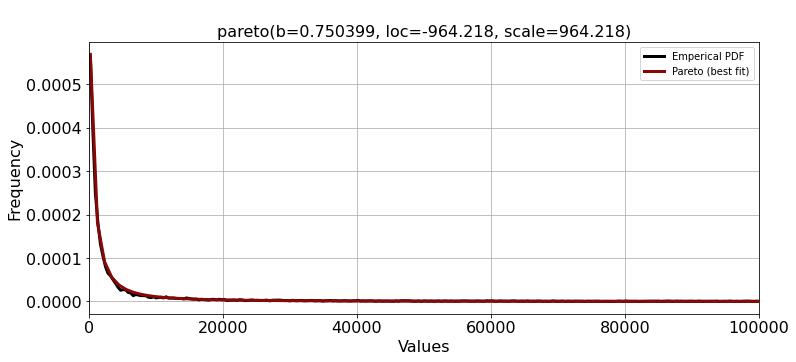

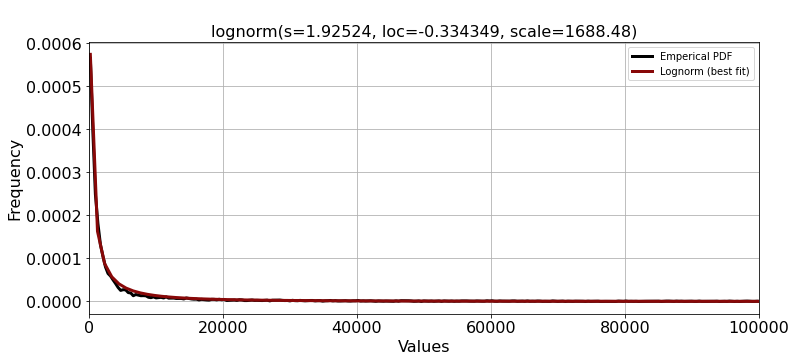

In [16]:
plot_best_distributions(data, model, num_distr=2, xlim=(0,100000), figsize=(12,5))

### listed_count

In [17]:
# Initialize data
data = dataset['listed_count']

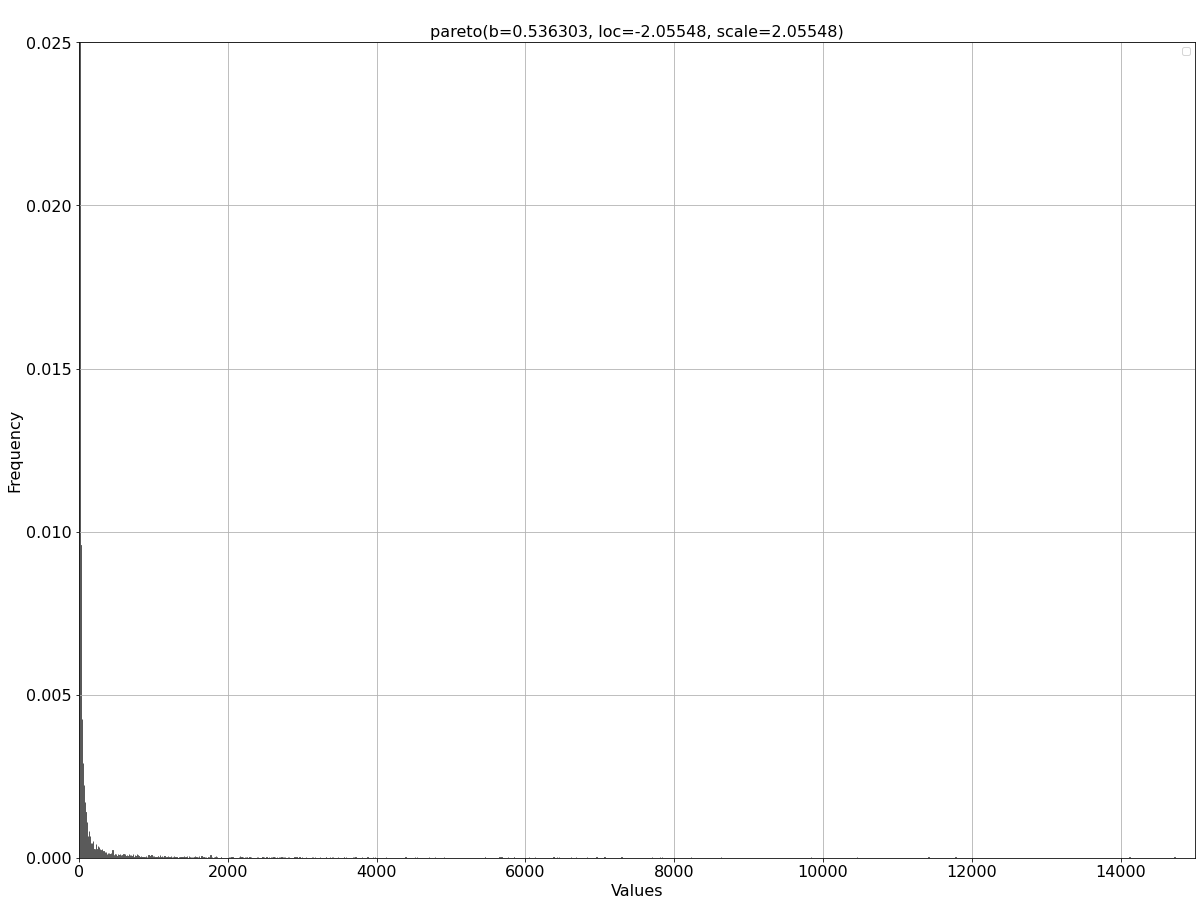

In [18]:
# Density distribution

# Initialize
dfit = distfit(alpha=0.01)

# Fit
dfit.fit_transform(data, verbose=0)

# Plot seperately
fig, ax = dfit.plot(xlim=(0,1.5e4),ylim=(0,0.025),chart='pdf', cii_properties=None, emp_properties=None, pdf_properties=None)

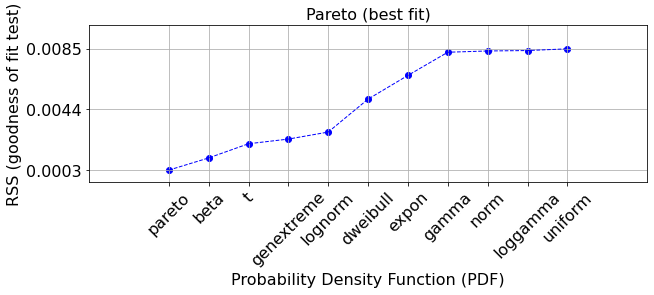

In [19]:
# Find best fitted distribution
model = find_distribution(data)

# Plot the best distributions RSS
model.plot_summary(figsize=(10, 3))
plt.show()

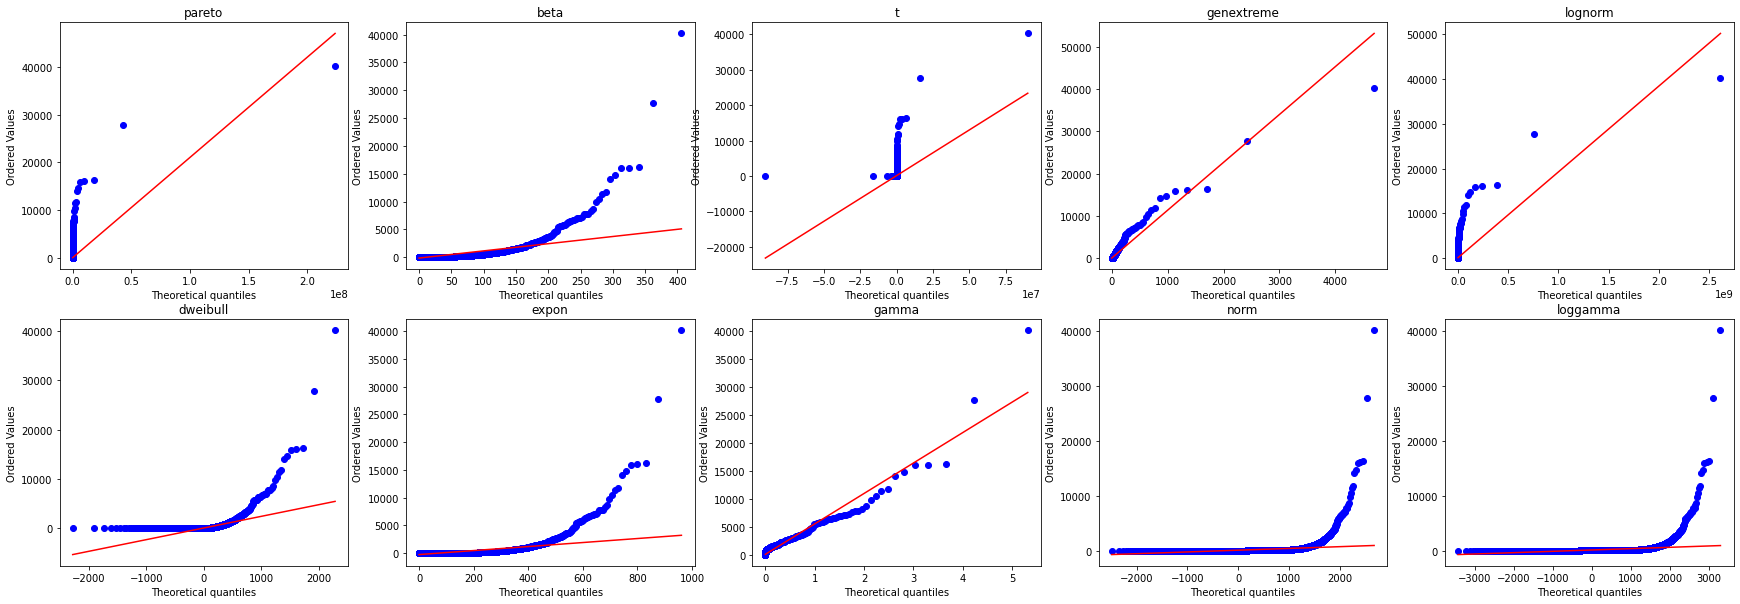

In [20]:
make_multiple_qqplot(data, model)

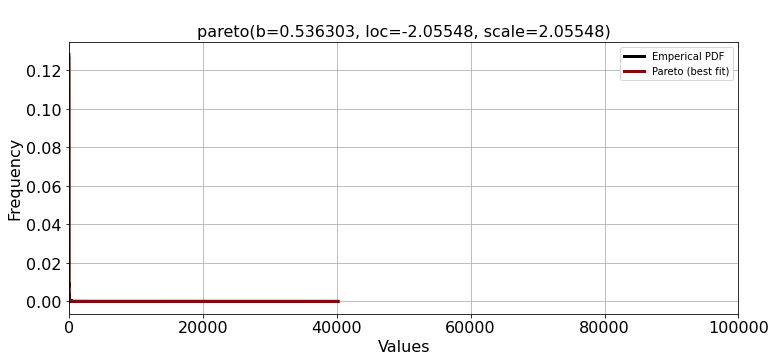

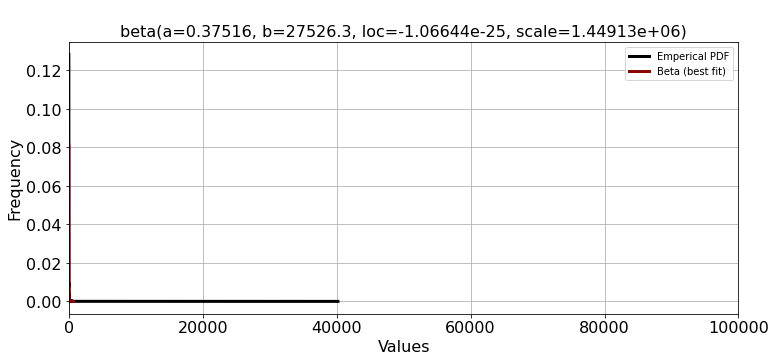

In [21]:
plot_best_distributions(data, model, num_distr=2, xlim=(0,100000), figsize=(12,5))

### favourites_count

In [22]:
# Initialize data
data = dataset['favourites_count']

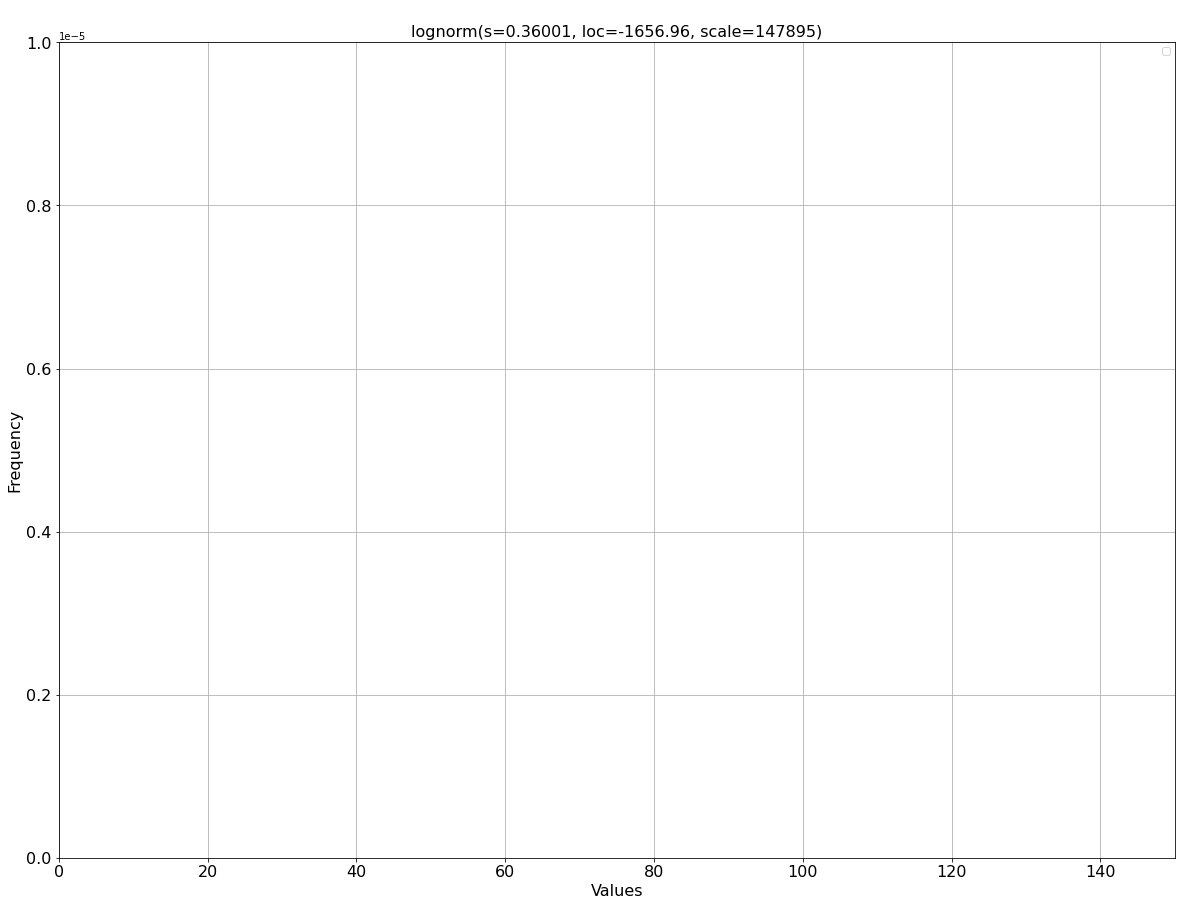

In [23]:
# Density distribution

# Initialize
dfit = distfit(alpha=0.01)

# Fit
dfit.fit_transform(data, verbose=0)

# Plot seperately
fig, ax = dfit.plot(xlim=(0,1.5e2),ylim=(0,1e-5),chart='pdf', cii_properties=None, emp_properties=None, pdf_properties=None)

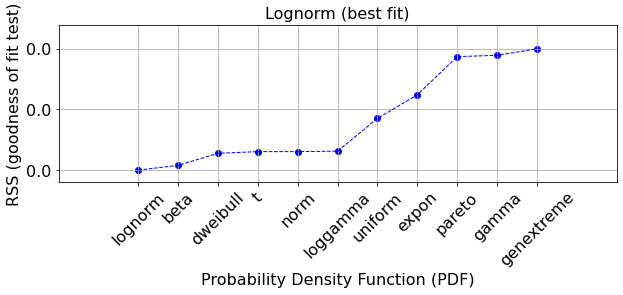

In [24]:
# Find best fitted distribution
model = find_distribution(data)

# Plot the best distributions RSS
model.plot_summary(figsize=(10, 3))
plt.show()

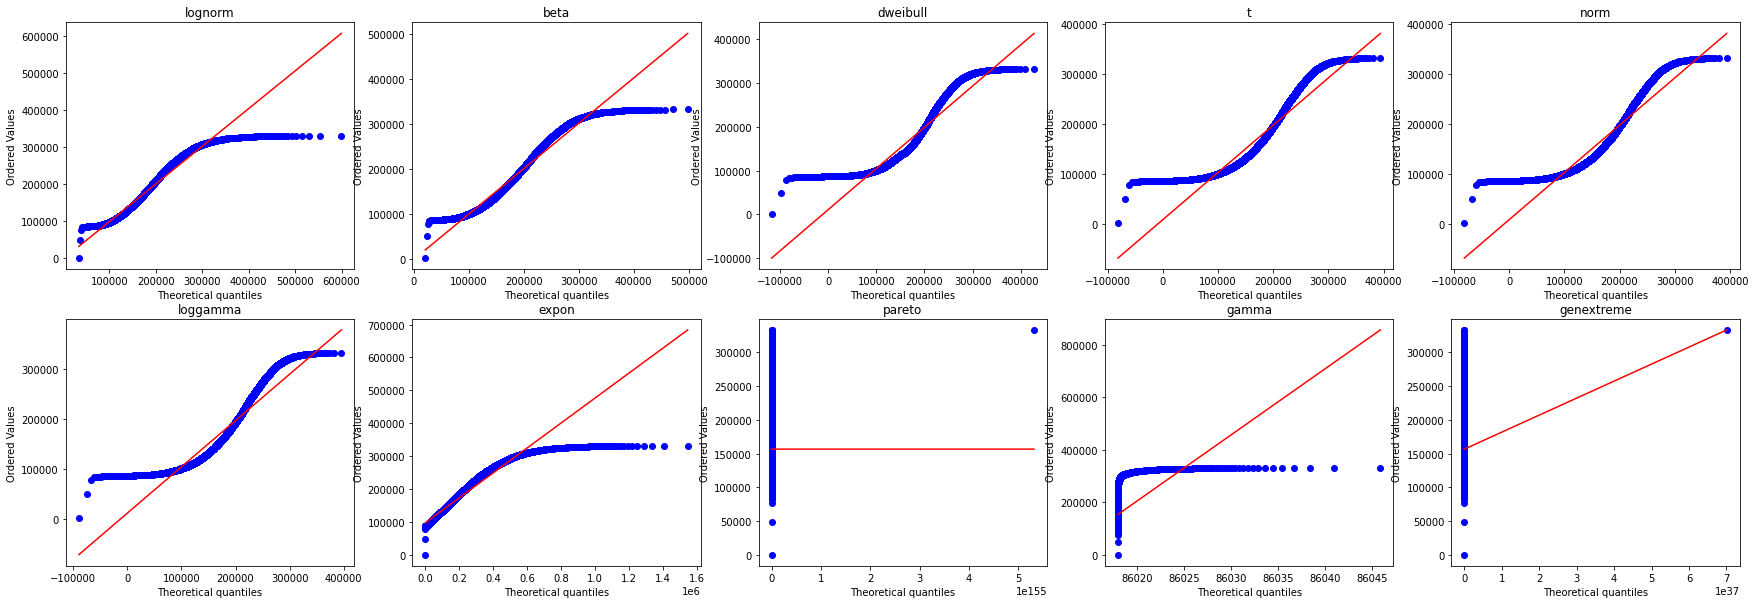

In [25]:
make_multiple_qqplot(data, model)

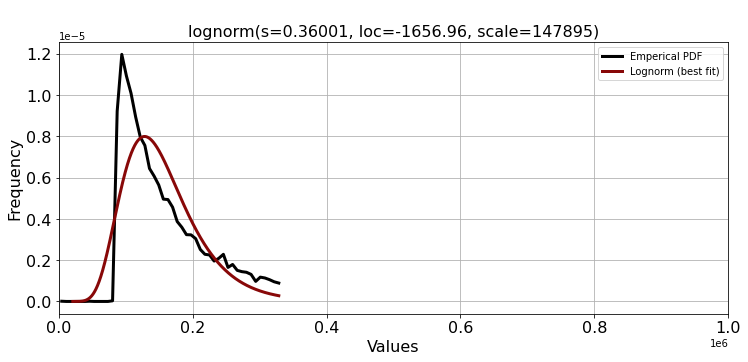

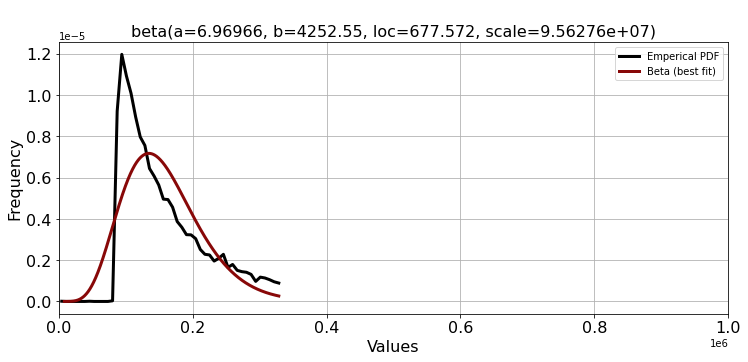

In [26]:
plot_best_distributions(data, model, num_distr=2, xlim=(0,1000000), figsize=(12,5))

### statuses_count

In [27]:
# Initialize data
data = dataset['statuses_count']

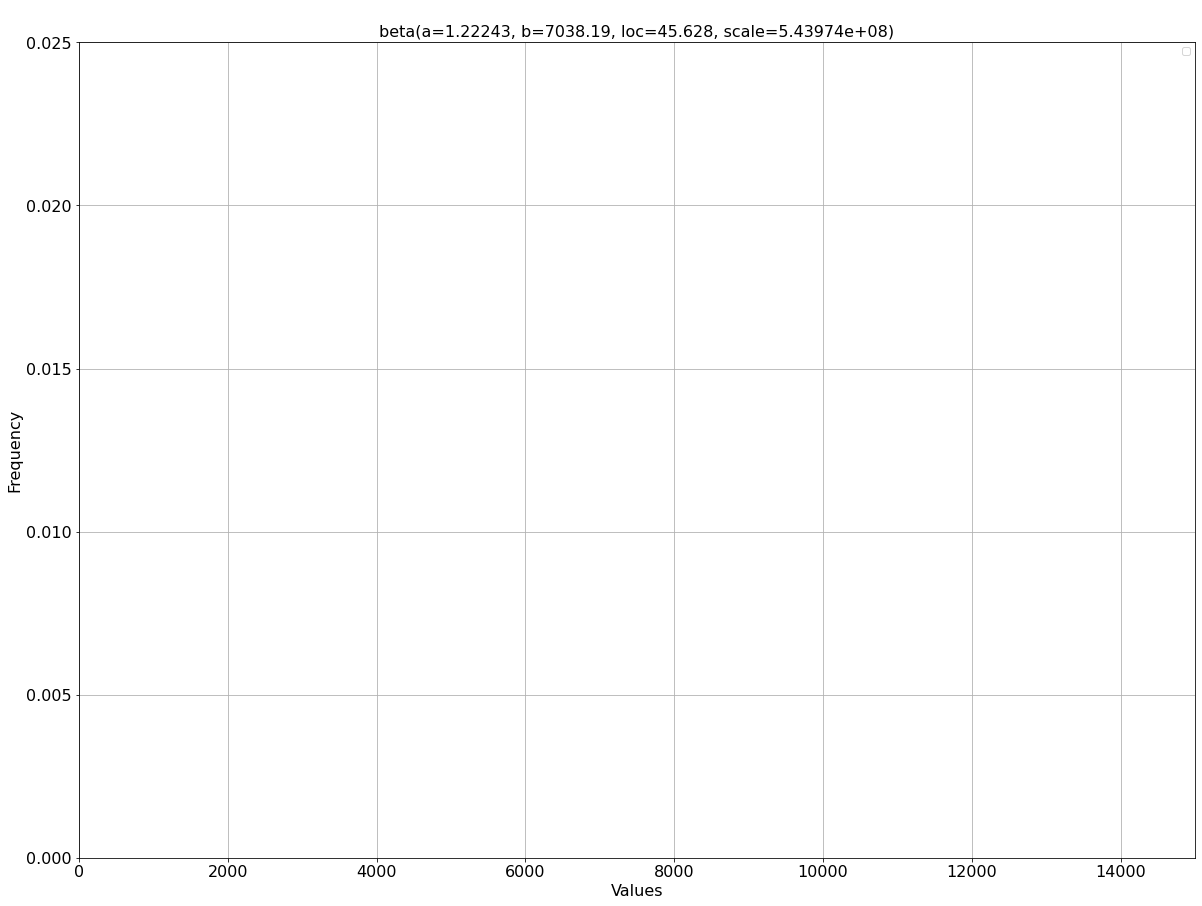

In [28]:
# Density distribution

# Initialize
dfit = distfit(alpha=0.01)

# Fit
dfit.fit_transform(data, verbose=0)

# Plot seperately
fig, ax = dfit.plot(xlim=(0,1.5e4),ylim=(0,0.025),chart='pdf', cii_properties=None, emp_properties=None, pdf_properties=None)

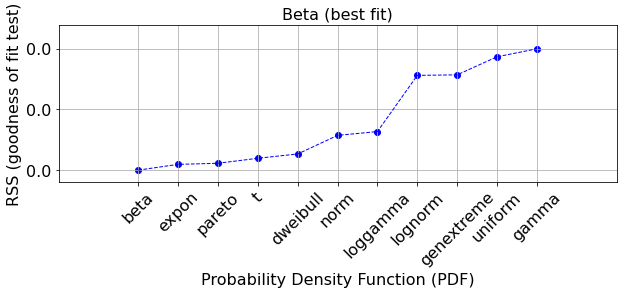

In [29]:
# Find best fitted distribution
model = find_distribution(data)

# Plot the best distributions RSS
model.plot_summary(figsize=(10, 3))
plt.show()

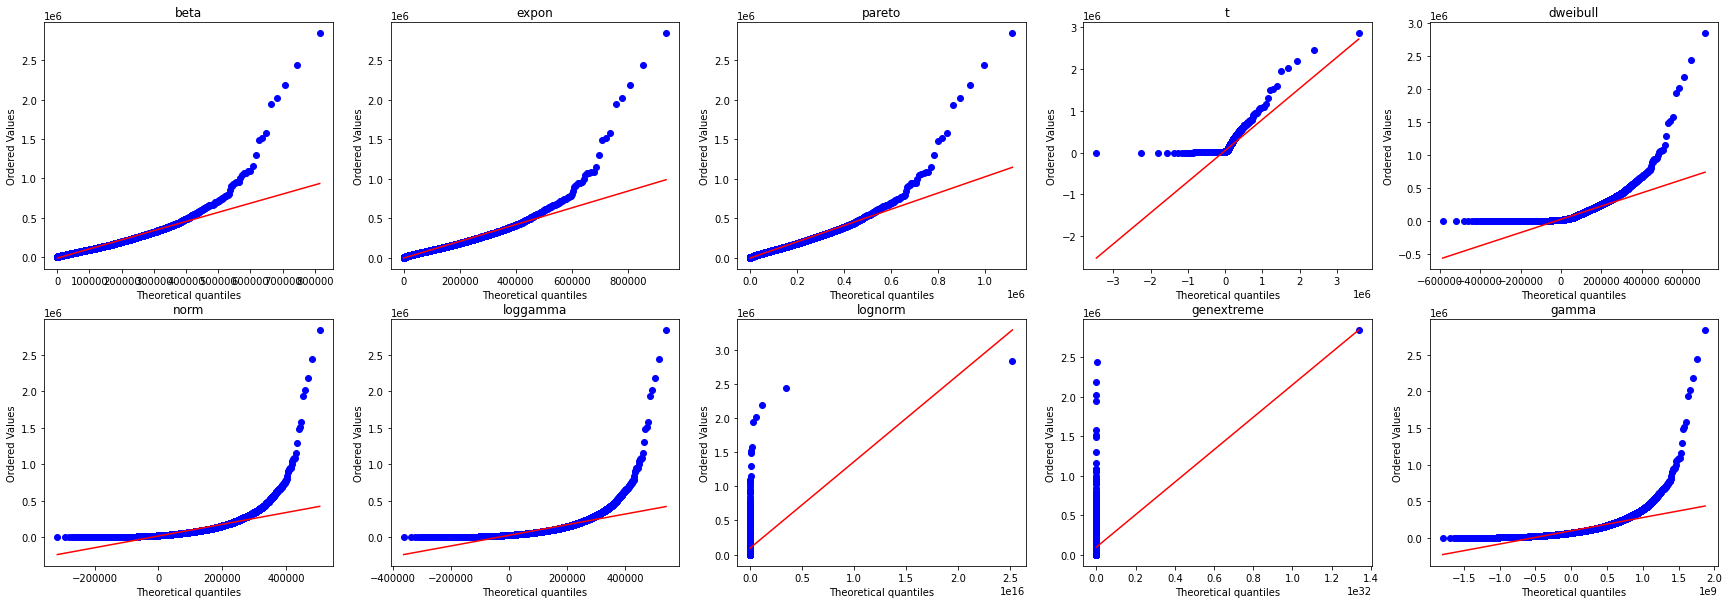

In [30]:
make_multiple_qqplot(data, model)

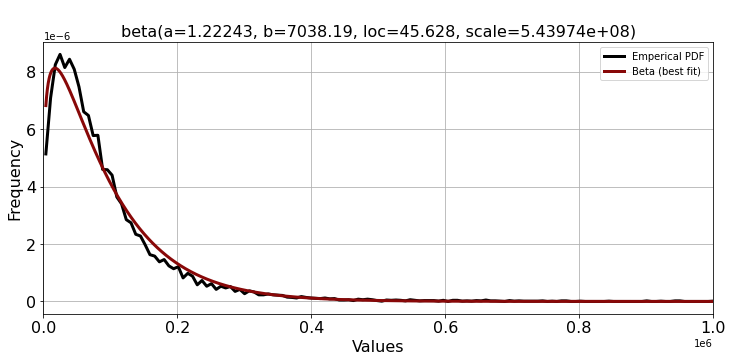

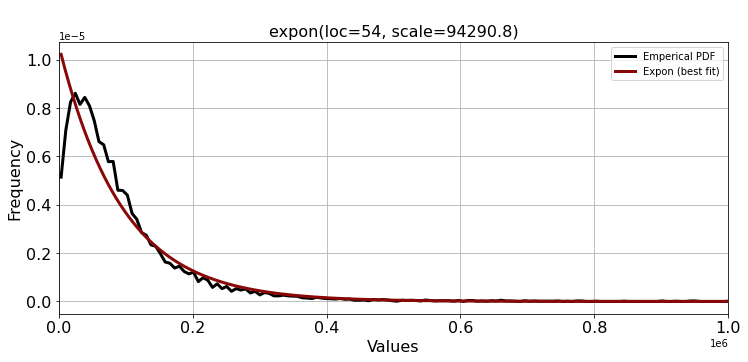

In [31]:
plot_best_distributions(data, model, num_distr=2, xlim=(0,1000000), figsize=(12,5))

### created_at

In [32]:
# Initialize data
data = dataset['created_at']

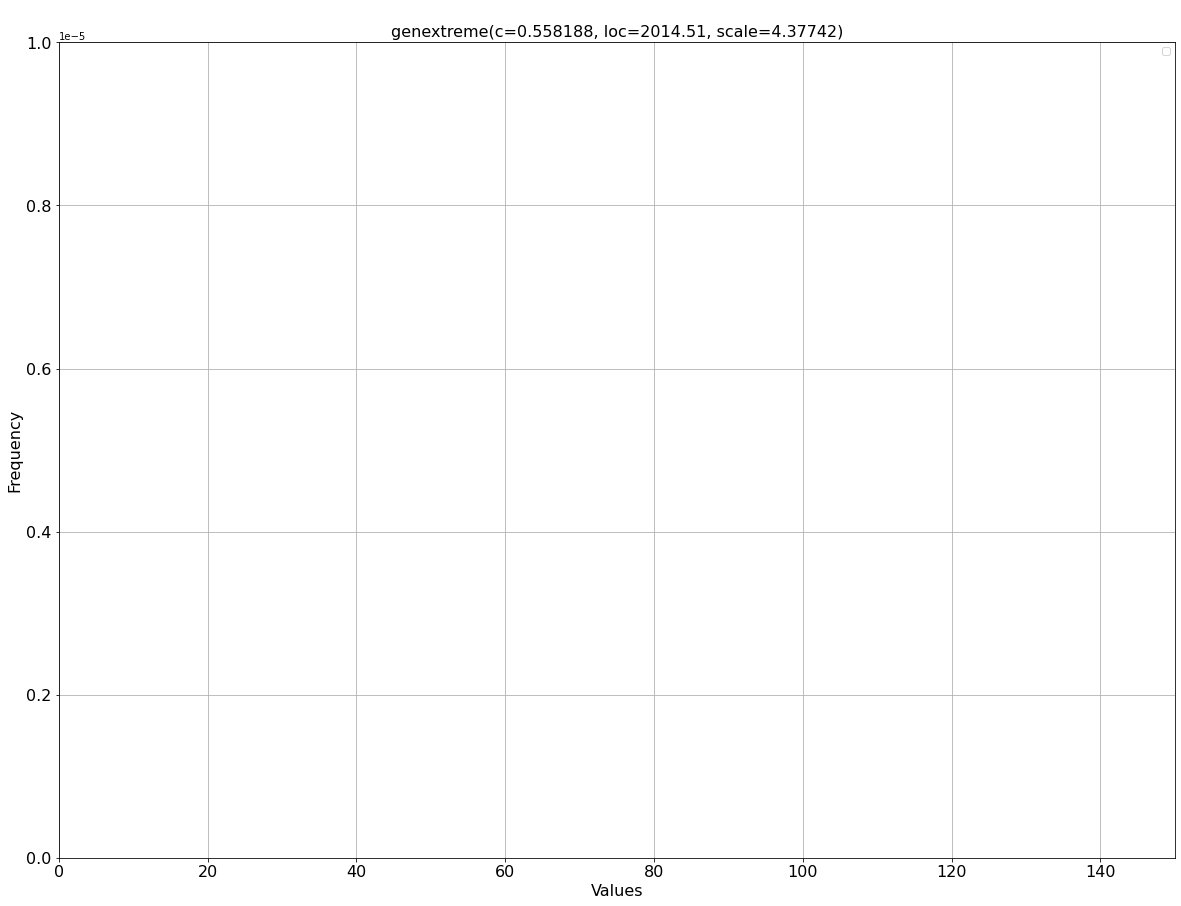

In [33]:
# Density distribution

# Initialize
dfit = distfit(alpha=0.01)

# Fit
dfit.fit_transform(data, verbose=0)

# Plot seperately
fig, ax = dfit.plot(xlim=(0,1.5e2),ylim=(0,1e-5),chart='pdf', cii_properties=None, emp_properties=None, pdf_properties=None)

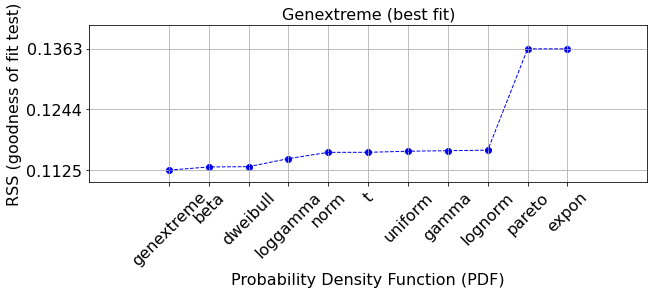

In [34]:
# Find best fitted distribution
model = find_distribution(data)

# Plot the best distributions RSS
model.plot_summary(figsize=(10, 3))
plt.show()

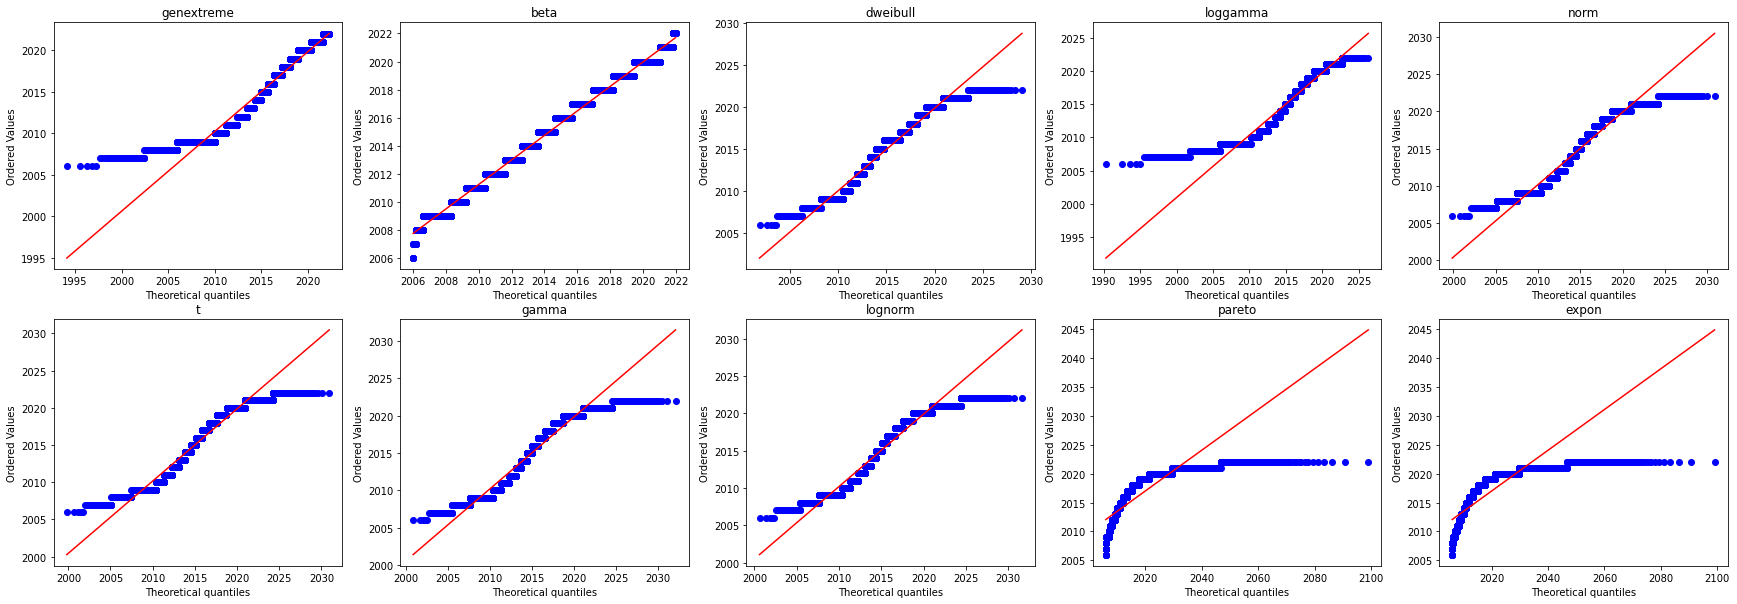

In [35]:
make_multiple_qqplot(data, model)

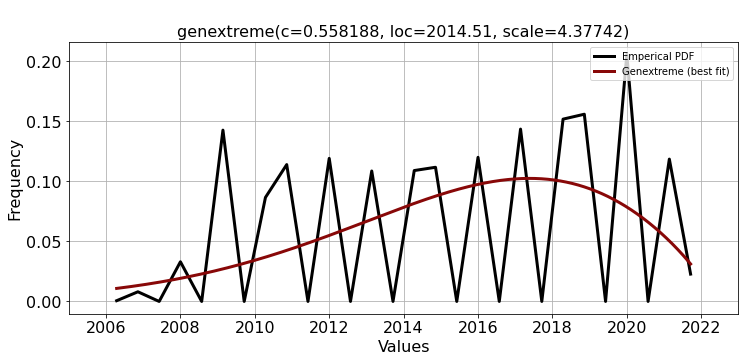

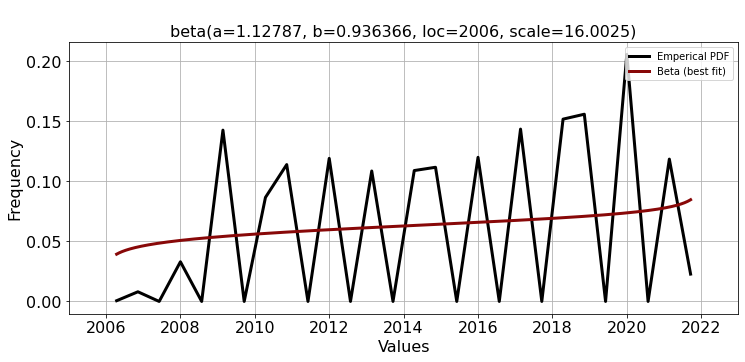

In [36]:
plot_best_distributions(data, model, num_distr=2, xlim=(2005,2023), figsize=(12,5))